# Market_Positioning_of_Mobile

# Load Data and Libraries:

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [150]:
train = pd.read_csv("C:/Projects/KNN-Mobile data/Mobile_data.csv")

# Audit the Data:

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [152]:
train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


***A KNNImputer is an library using to impute the missing values.***

In [153]:
train.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


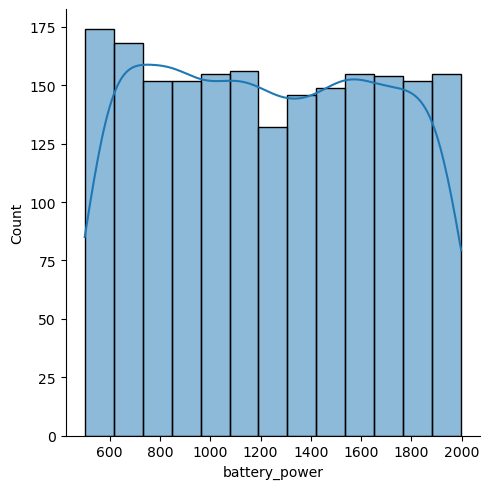

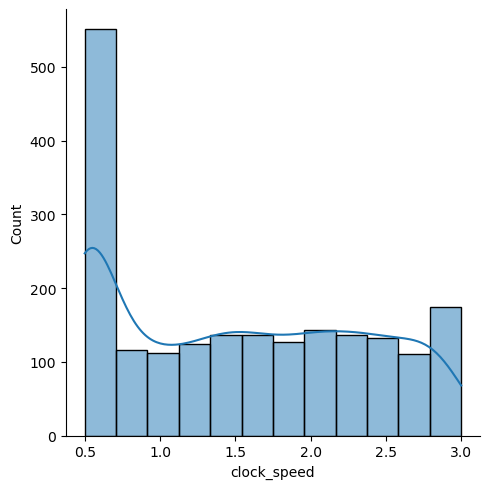

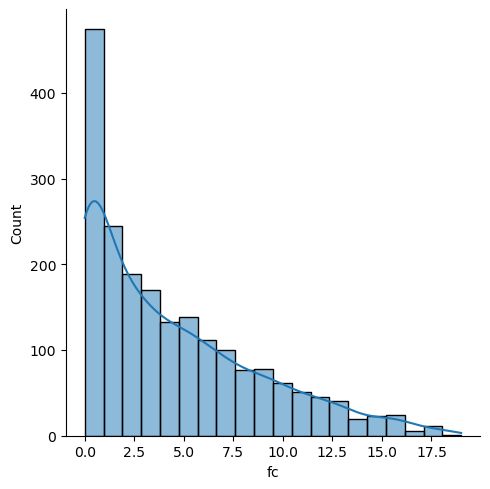

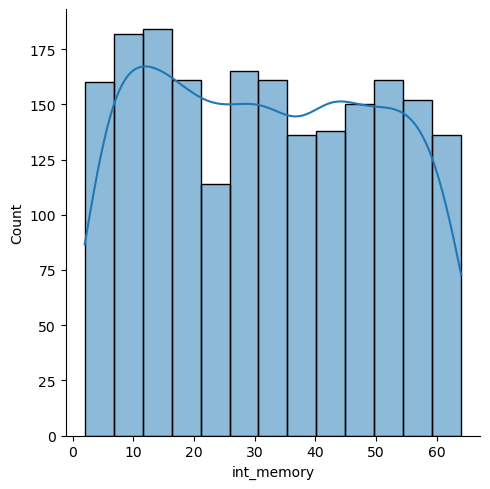

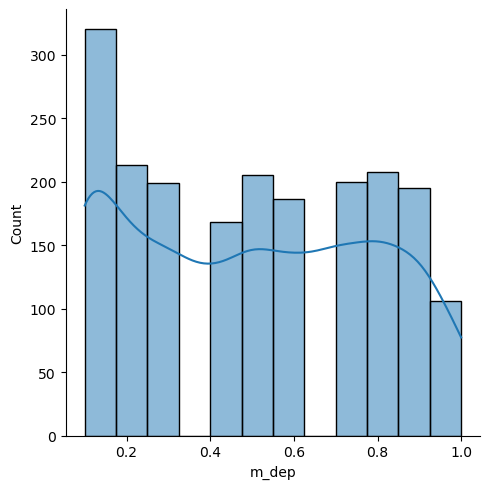

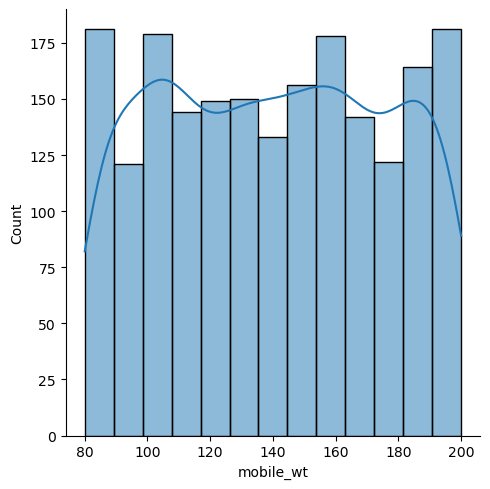

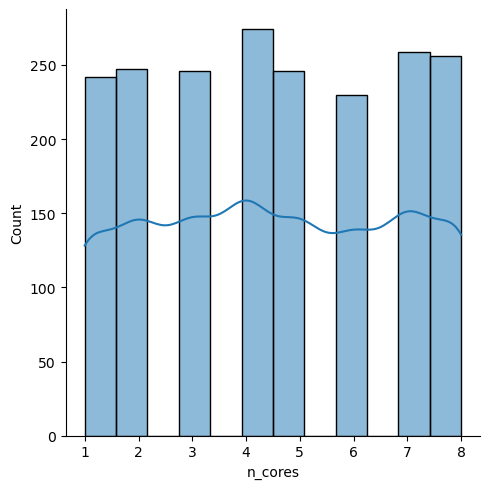

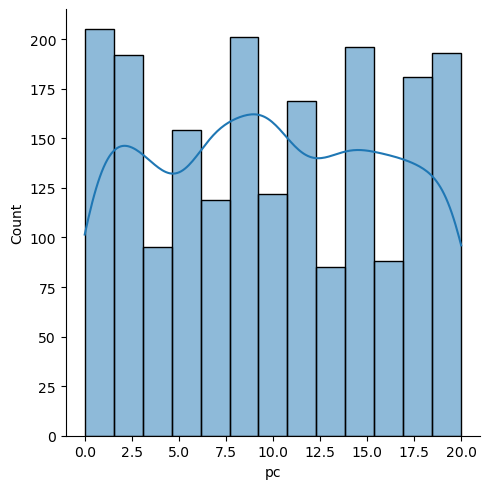

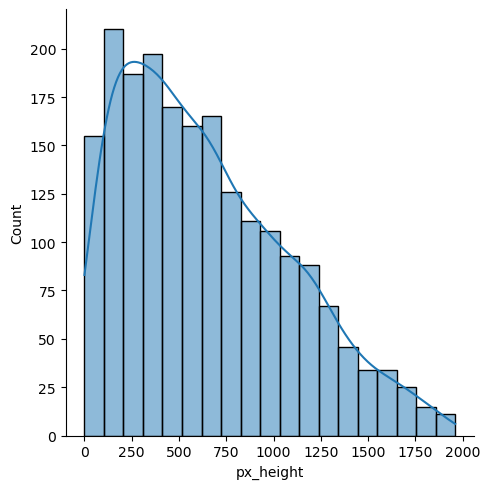

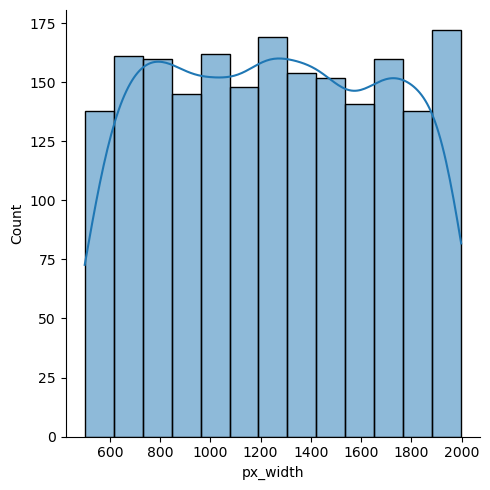

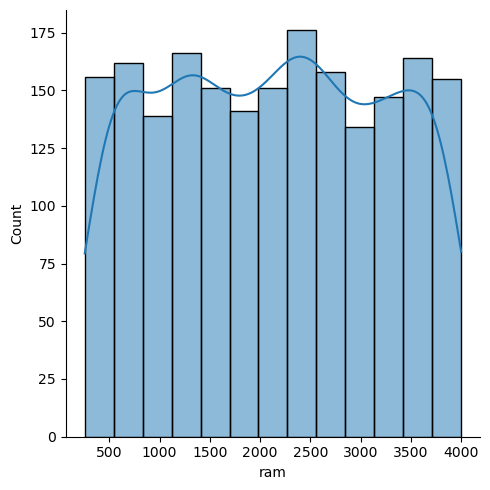

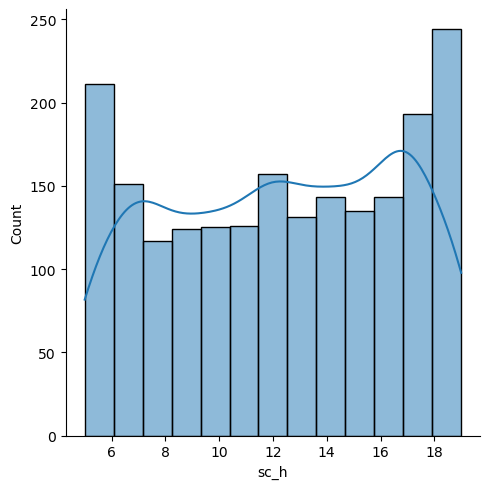

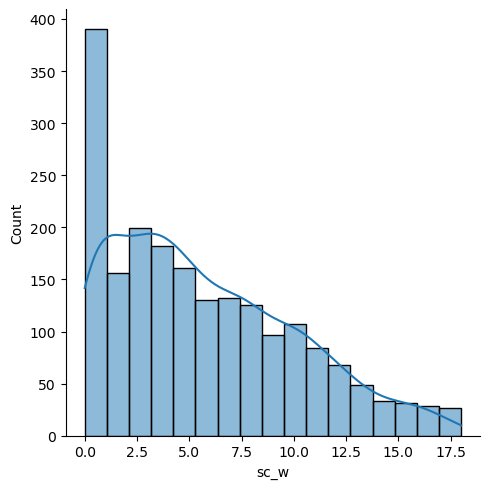

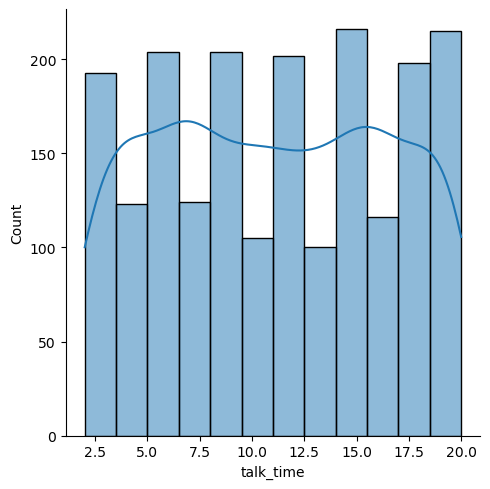

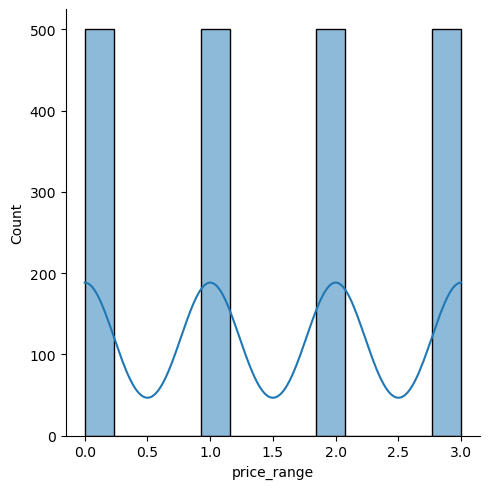

In [154]:
for i in train.columns:
    sns.displot(train[i] , kde = True)

In [155]:
train.skew()

battery_power    0.031898
clock_speed      0.178084
fc               1.019811
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
price_range      0.000000
dtype: float64

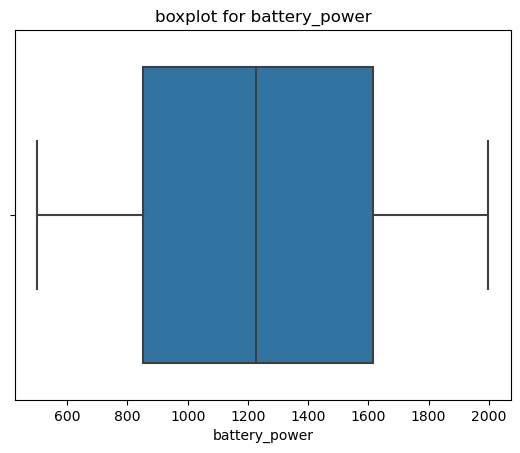

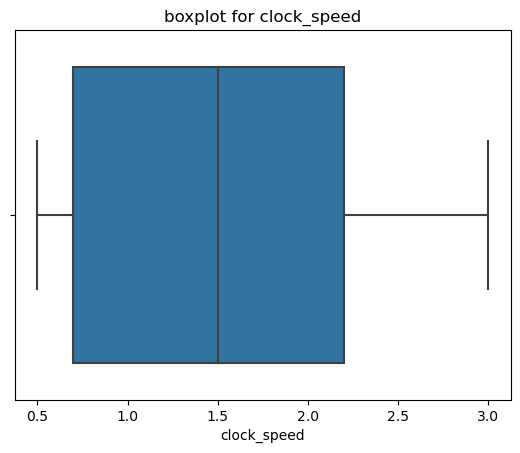

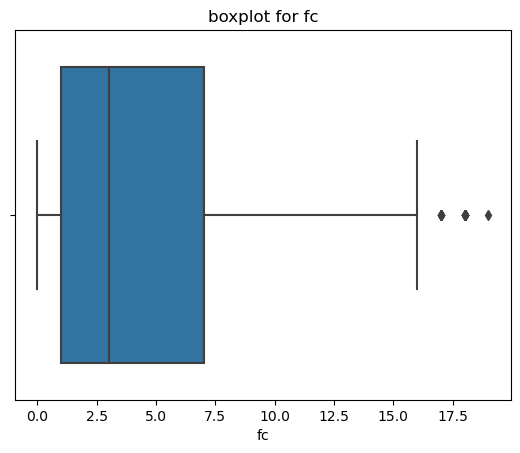

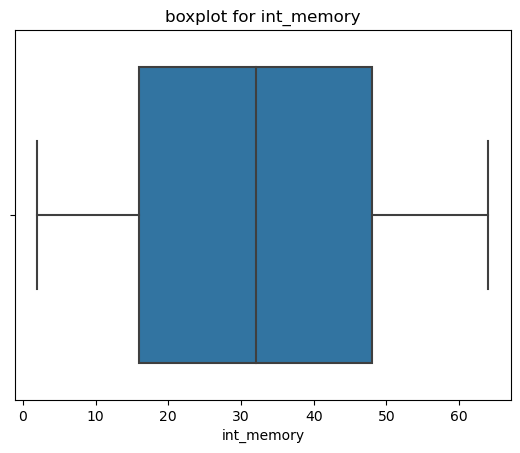

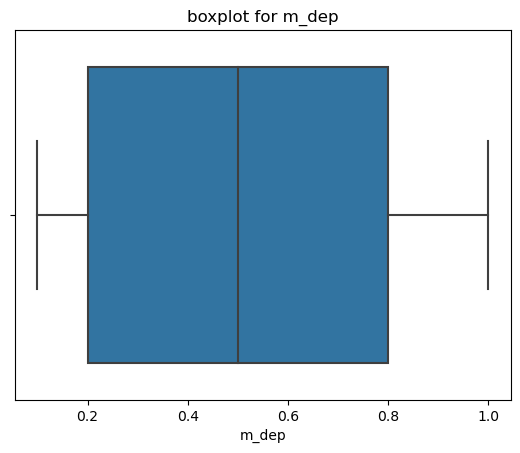

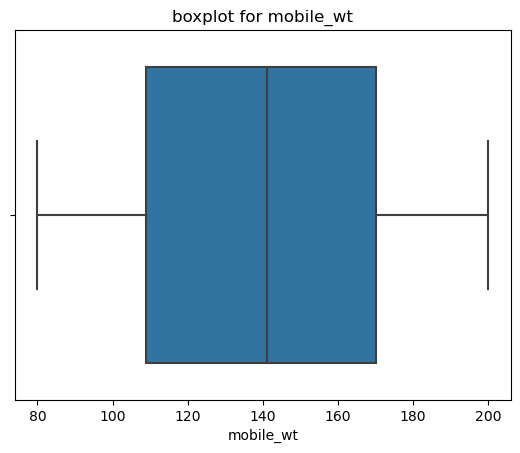

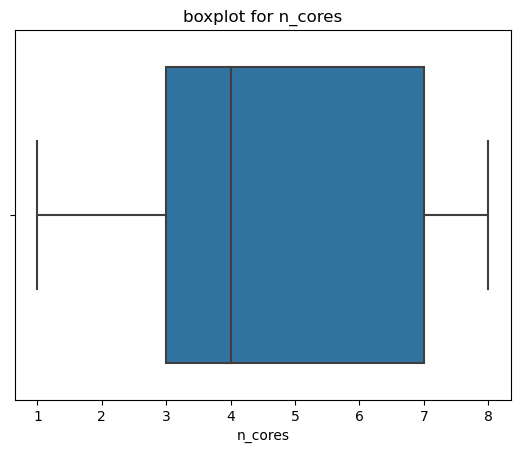

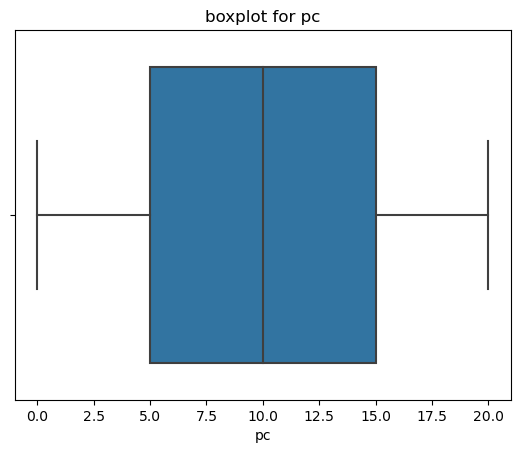

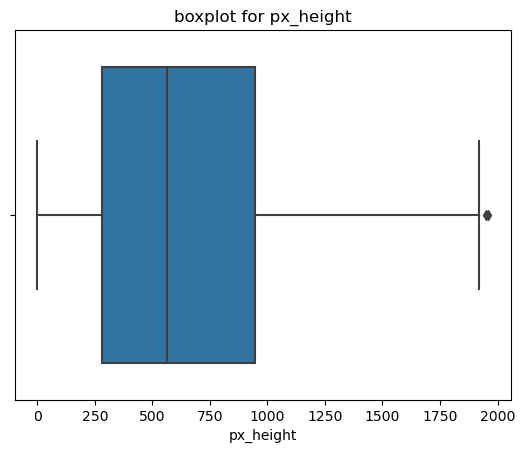

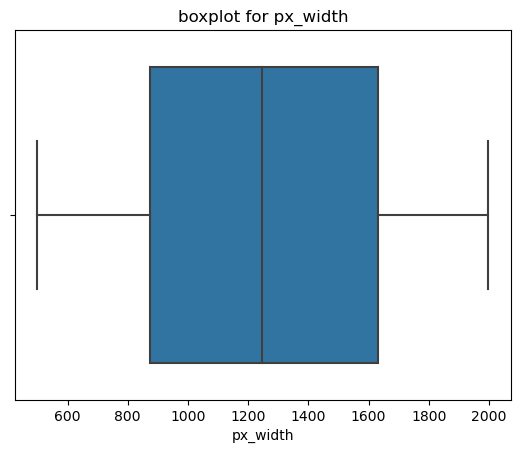

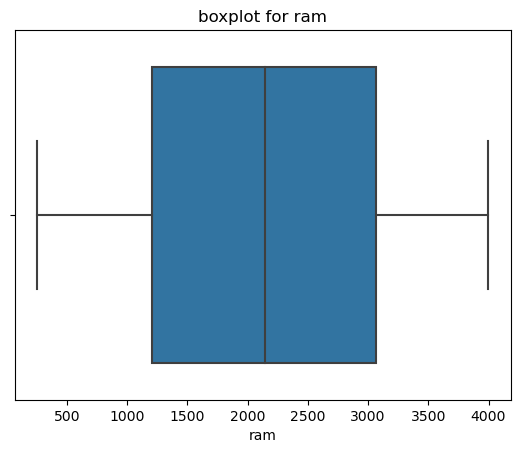

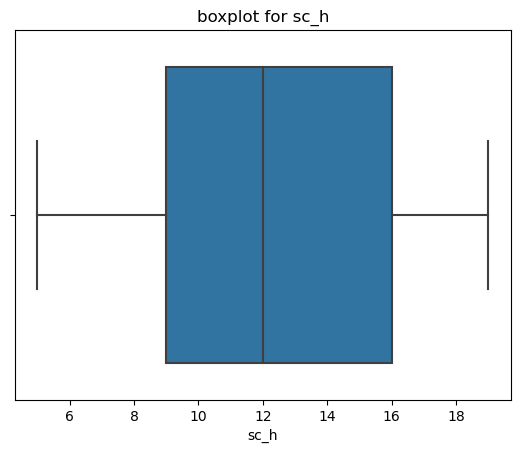

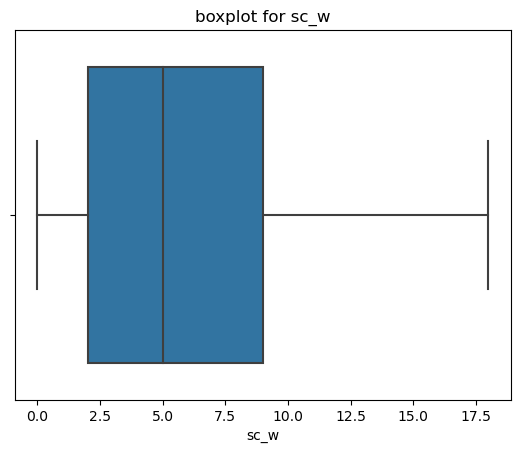

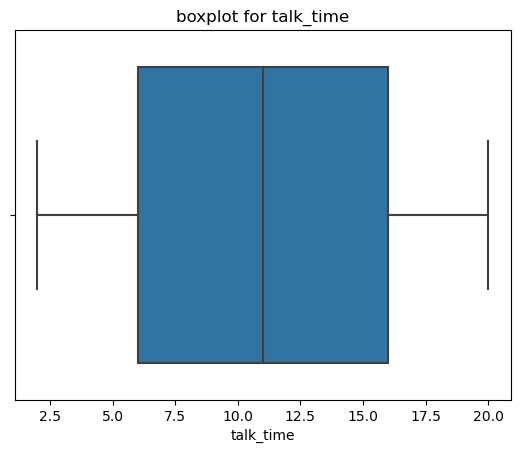

In [156]:
for i in train.columns:
  if i!='price_range':
    sns.boxplot(x = train[i], hue = train['price_range'])
    plt.title(f"boxplot for {i}")
    plt.show()

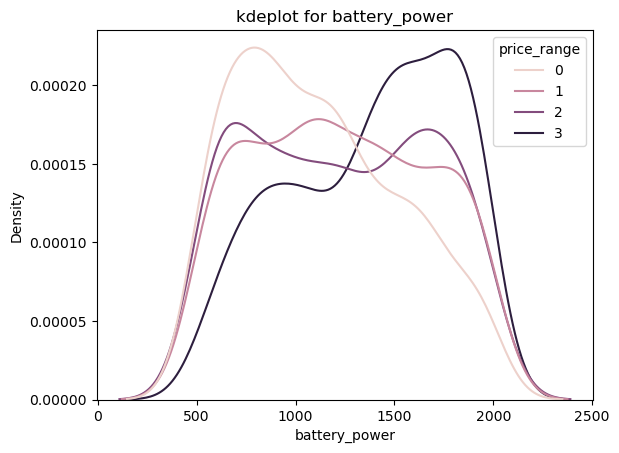

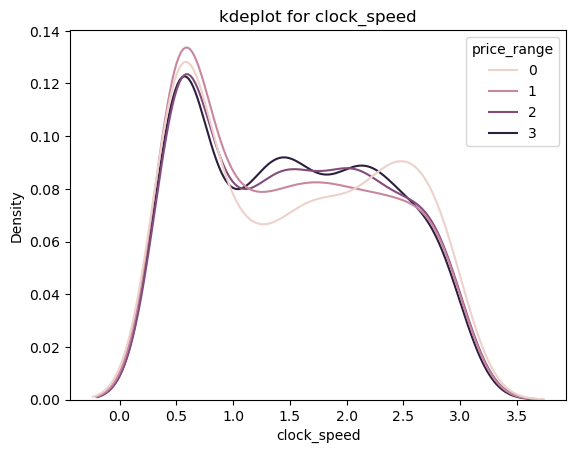

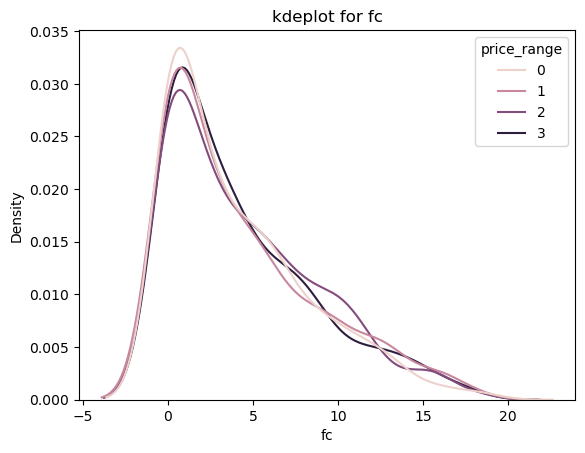

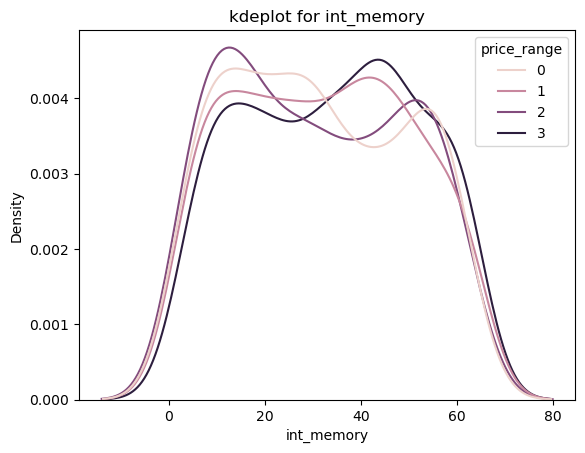

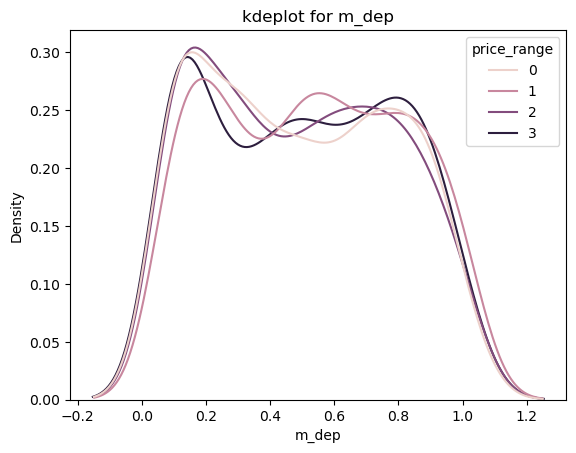

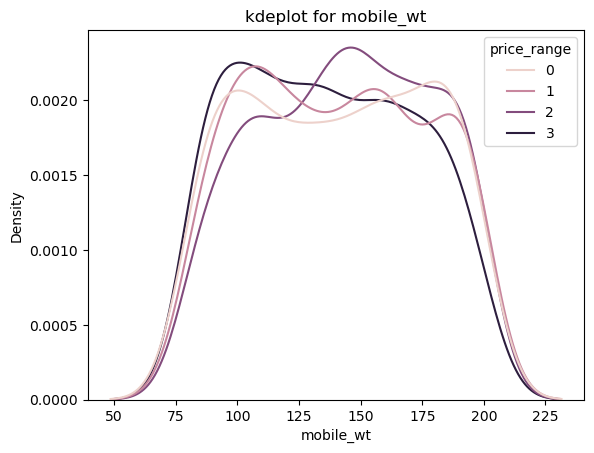

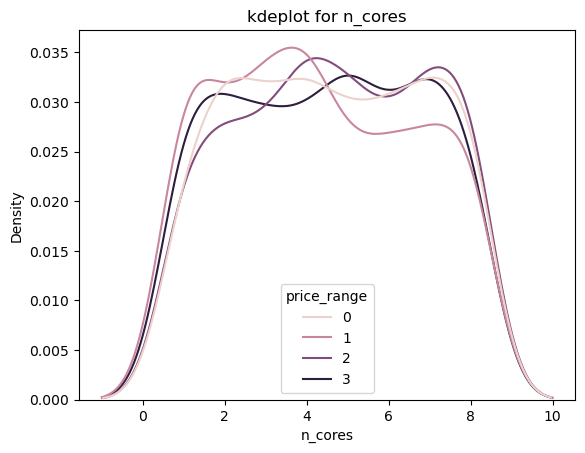

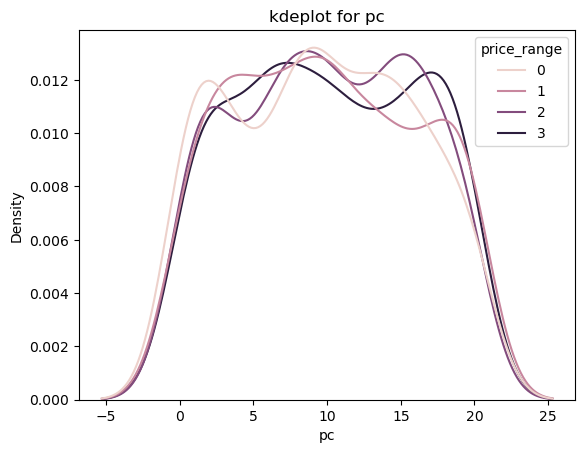

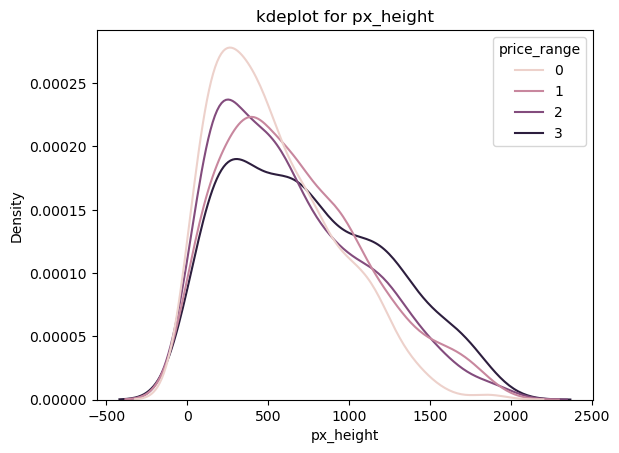

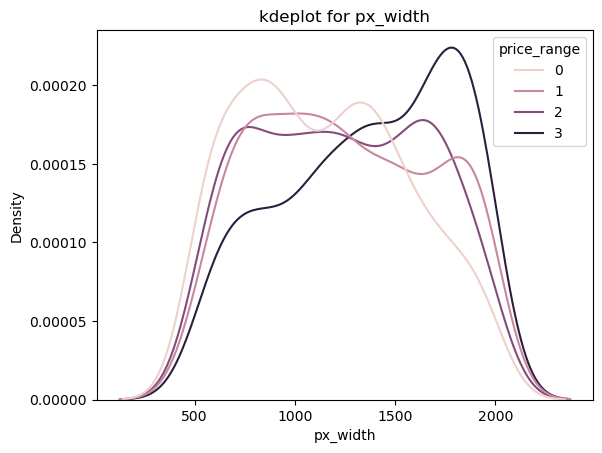

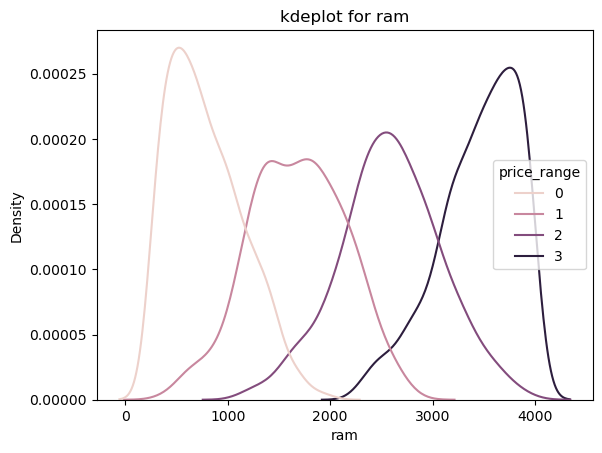

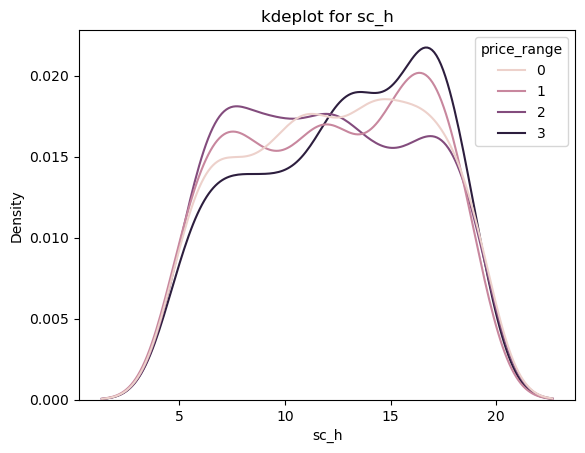

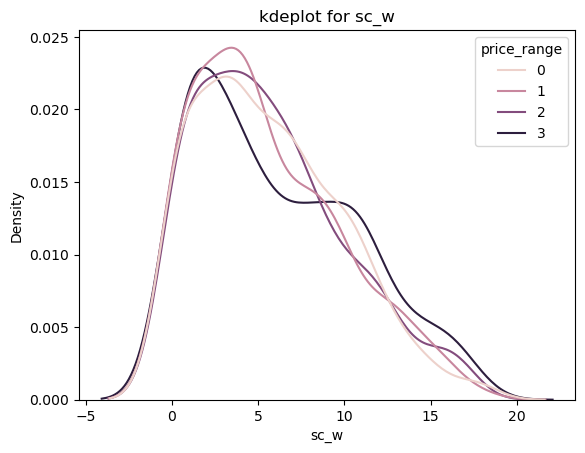

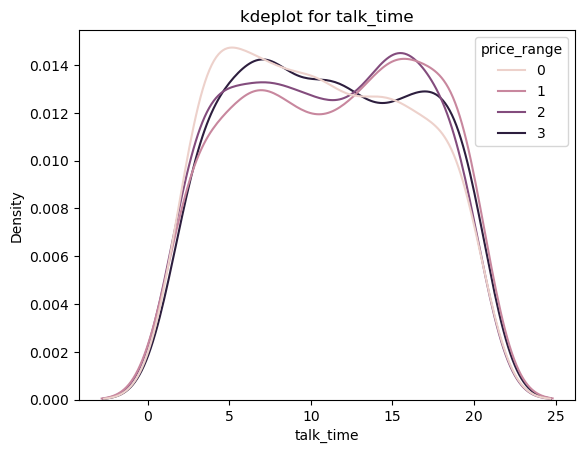

In [157]:
for i in train.columns:
  if i!='price_range':
    sns.kdeplot(x = train[i], hue = train['price_range'])
    plt.title(f"kdeplot for {i}")
    plt.show()

***RAM Shows the standerd and good distribution and others are overlapping feature.***

# Bi-Variate Analysis:

<Axes: >

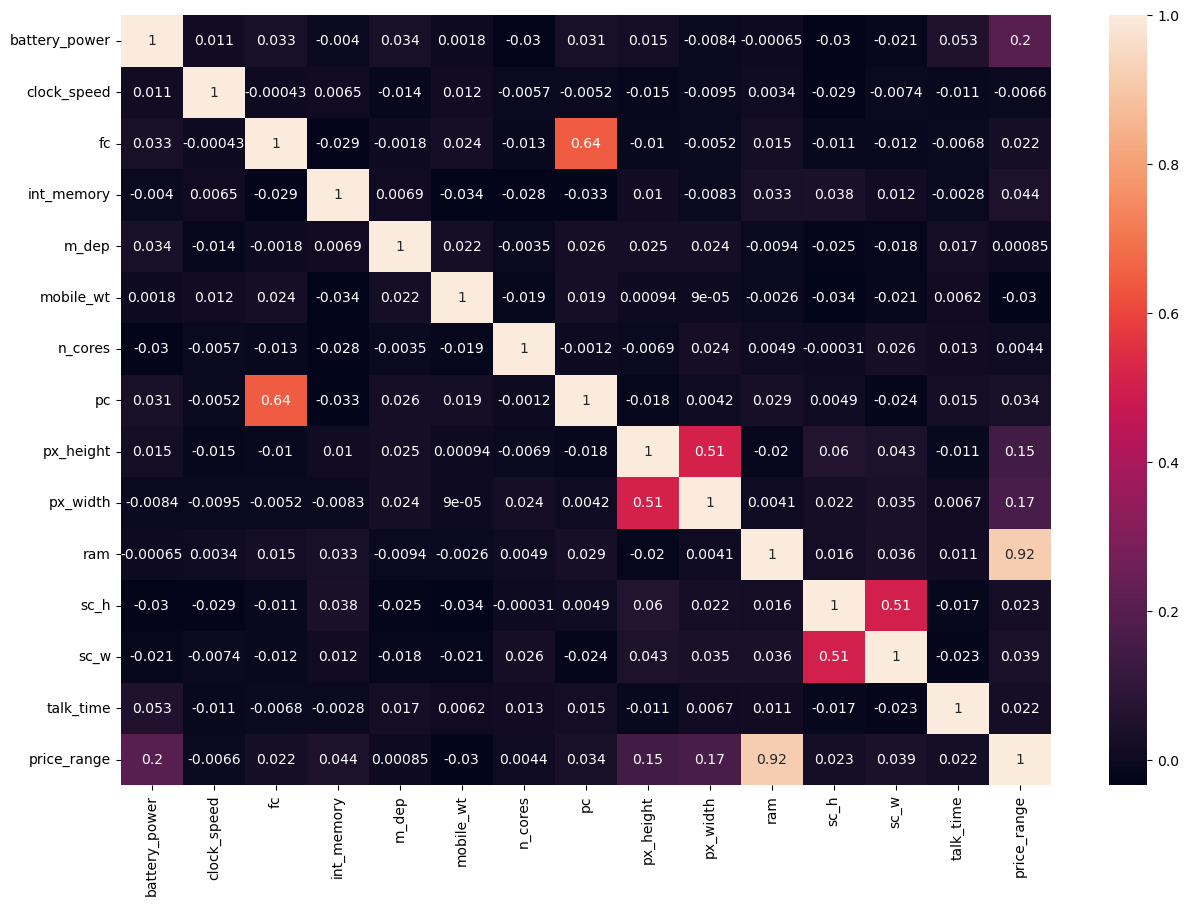

In [158]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot = True)

***greater than 0.75 or -0.75 are high correlation.***

# Data Preparation:

In [159]:
x = train.drop(['price_range'],axis =1)
y = train['price_range']

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 14)
(400, 14)
(1600,)
(400,)


# Multi-Variate Model:

# APPLYING THE MODEL:

In [161]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\DELL\anaconda3\downloads\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [162]:
print(logreg.intercept_)

[ 4.96076753e-04  1.53495484e-04 -8.24299976e-05 -5.67142240e-04]


In [163]:
print(logreg.coef_)

[[-5.36487647e-04  8.84578956e-04  1.61425023e-03  1.32879870e-02
   1.83552791e-04  4.59544011e-02  2.53266866e-03  4.66939973e-03
  -2.03012541e-03  1.19318037e-03 -4.13120143e-03  6.35942162e-03
   3.15782045e-03  4.11282576e-03]
 [ 1.26233870e-04  4.69798834e-05  7.84008190e-04  4.63095332e-03
   1.15862458e-04  1.41272137e-02  9.52041163e-05  1.57119096e-03
  -6.53548554e-05  2.58912337e-04 -7.04099660e-04  1.37948508e-03
   3.69414511e-05  3.21860388e-03]
 [ 1.65153993e-04 -1.17951782e-04  4.11979956e-04 -6.77495174e-03
  -4.06414005e-05 -1.45950229e-02  1.67726129e-04 -1.14522483e-03
   7.32546572e-04 -4.79563528e-04  1.59376204e-03 -1.62028507e-03
  -7.38586053e-04 -1.27752360e-03]
 [ 2.45099784e-04 -8.13607058e-04 -2.81023838e-03 -1.11439886e-02
  -2.58773848e-04 -4.54865919e-02 -2.79559890e-03 -5.09536586e-03
   1.36293370e-03 -9.72529183e-04  3.24153905e-03 -6.11862163e-03
  -2.45617585e-03 -6.05390605e-03]]


In [164]:
x_train.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')

In [165]:
proba_train = logreg.predict_proba(x_train)
proba_train
#left side is for not getting a loan, right side is for getting a loan.

array([[3.28512301e-04, 5.66763648e-02, 3.32230583e-01, 6.10764539e-01],
       [1.83217728e-03, 1.83359273e-01, 4.15902069e-01, 3.98906480e-01],
       [1.56917643e-04, 4.61906205e-02, 3.64746198e-01, 5.88906264e-01],
       ...,
       [8.11206445e-01, 1.83488455e-01, 5.21952945e-03, 8.55708361e-05],
       [9.76699017e-01, 2.30832324e-02, 2.14952387e-04, 2.79841215e-06],
       [2.63969349e-03, 2.72731258e-01, 5.77321342e-01, 1.47307707e-01]])

In [166]:
y_hat_train = logreg.predict(x_train)
y_hat_test = logreg.predict(x_test)

# MODEL EVALUATION:

In [167]:
conf_matrix_train = confusion_matrix(y_train, y_hat_train)
print(conf_matrix_train)

[[332  76   5   0]
 [ 67 216  89  28]
 [  1  91 174 118]
 [  0   4  93 306]]


In [168]:
conf_matrix_test = confusion_matrix(y_test, y_hat_test)
print(conf_matrix_test)

[[65 22  0  0]
 [20 61 13  6]
 [ 0 29 44 43]
 [ 0  0 13 84]]


In [169]:
print("Accuracy score for train",accuracy_score(y_train, y_hat_train))

Accuracy score for train 0.6425


In [170]:
print("Accuracy score for test",accuracy_score(y_test, y_hat_test))

Accuracy score for test 0.635


In [171]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76        87
           1       0.54      0.61      0.58       100
           2       0.63      0.38      0.47       116
           3       0.63      0.87      0.73        97

    accuracy                           0.64       400
   macro avg       0.64      0.65      0.63       400
weighted avg       0.64      0.64      0.62       400



In [172]:
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       413
           1       0.56      0.54      0.55       400
           2       0.48      0.45      0.47       384
           3       0.68      0.76      0.72       403

    accuracy                           0.64      1600
   macro avg       0.64      0.64      0.64      1600
weighted avg       0.64      0.64      0.64      1600



# Decision Tree Model:

In [173]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 4)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [174]:
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

In [175]:
def model_eval(actual, predict):
    conf_matrix = confusion_matrix(actual, predict)
    class_rep = classification_report(actual, predict)
    acc_score = accuracy_score(actual, predict)
    print('The Accuracy of the model is: ', round(acc_score, 2))
    print(conf_matrix)
    print(class_rep)

In [176]:
model_eval(y_train, y_hat_train_dtree)

The Accuracy of the model is:  0.83
[[389  24   0   0]
 [ 39 349  12   0]
 [  0 118 214  52]
 [  0   1  28 374]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       413
           1       0.71      0.87      0.78       400
           2       0.84      0.56      0.67       384
           3       0.88      0.93      0.90       403

    accuracy                           0.83      1600
   macro avg       0.83      0.82      0.82      1600
weighted avg       0.84      0.83      0.82      1600



In [177]:
model_eval(y_test, y_hat_test_dtree)

The Accuracy of the model is:  0.77
[[79  8  0  0]
 [15 78  7  0]
 [ 0 37 61 18]
 [ 0  0  8 89]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        87
           1       0.63      0.78      0.70       100
           2       0.80      0.53      0.64       116
           3       0.83      0.92      0.87        97

    accuracy                           0.77       400
   macro avg       0.78      0.78      0.77       400
weighted avg       0.78      0.77      0.76       400



***Because of an high variance use the max_depth to reduce the complexity.without using it(acc=1,acc=0.77)***

# Feature Selection Using Dicision Tree:

In [178]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

,col_name
ram,0.860306
battery_power,0.077614
px_height,0.032999
px_width,0.029081
clock_speed,0.000000
fc,0.000000
int_memory,0.000000
m_dep,0.000000
mobile_wt,0.000000
n_cores,0.000000


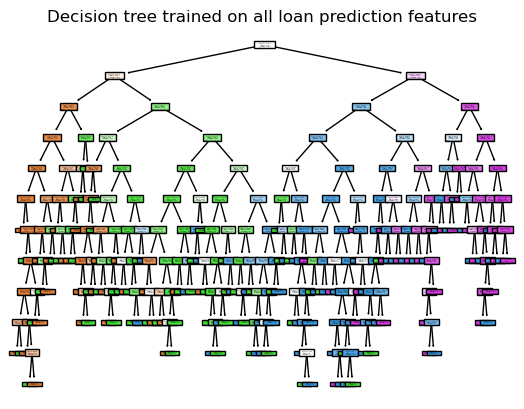

In [179]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure()
clf = DecisionTreeClassifier().fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all loan prediction features")
plt.show()

***The depth is too high so it become more complex and it become overfit. So reduce the depth.***

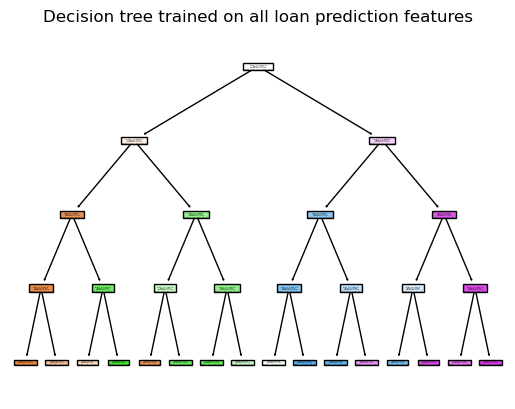

In [180]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure()
clf = DecisionTreeClassifier(max_depth = 4).fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all loan prediction features")
plt.show()

# RANDOM FOREST:

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 5, verbose = 1)
rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished


RandomForestClassifier(max_depth=5, n_estimators=200, verbose=1)

In [183]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [184]:
model_eval(y_train, y_hat_train_rf)

The Accuracy of the model is:  0.91
[[402  11   0   0]
 [ 20 351  29   0]
 [  0  59 307  18]
 [  0   0   3 400]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       413
           1       0.83      0.88      0.86       400
           2       0.91      0.80      0.85       384
           3       0.96      0.99      0.97       403

    accuracy                           0.91      1600
   macro avg       0.91      0.91      0.91      1600
weighted avg       0.91      0.91      0.91      1600



In [185]:
model_eval(y_test, y_hat_test_rf)

The Accuracy of the model is:  0.84
[[87  0  0  0]
 [11 81  8  0]
 [ 0 23 77 16]
 [ 0  0  4 93]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        87
           1       0.78      0.81      0.79       100
           2       0.87      0.66      0.75       116
           3       0.85      0.96      0.90        97

    accuracy                           0.84       400
   macro avg       0.85      0.86      0.85       400
weighted avg       0.85      0.84      0.84       400



# ADABOOST CLASSIFIER:

In [186]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [187]:
ada = AdaBoostClassifier(n_estimators = 100)
ada.fit(x_train, y_train)
y_train_ada = ada.predict(x_train)
y_hat_test_ada = ada.predict(x_test)

In [188]:
model_eval(y_train, y_train_ada)

The Accuracy of the model is:  0.83
[[392  21   0   0]
 [ 67 286  47   0]
 [  0  41 300  43]
 [  0   0  56 347]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       413
           1       0.82      0.71      0.76       400
           2       0.74      0.78      0.76       384
           3       0.89      0.86      0.88       403

    accuracy                           0.83      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       0.83      0.83      0.83      1600



In [189]:
model_eval(y_test, y_hat_test_ada)

The Accuracy of the model is:  0.83
[[83  4  0  0]
 [18 70 12  0]
 [ 0 12 92 12]
 [ 0  0 11 86]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        87
           1       0.81      0.70      0.75       100
           2       0.80      0.79      0.80       116
           3       0.88      0.89      0.88        97

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



***Adaboost showing low bias prediction.***

# GRADIENT BOOSTING:

In [190]:
gb= GradientBoostingClassifier(n_estimators = 150)
gb.fit(x_train, y_train)
y_train_gb = gb.predict(x_train)
y_hat_test_gb = gb.predict(x_test)

In [191]:
model_eval(y_train, y_train_gb)

The Accuracy of the model is:  1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [192]:
model_eval(y_test, y_hat_test_gb)

The Accuracy of the model is:  0.92
[[ 85   2   0   0]
 [  5  91   4   0]
 [  0   7 100   9]
 [  0   0   7  90]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        87
           1       0.91      0.91      0.91       100
           2       0.90      0.86      0.88       116
           3       0.91      0.93      0.92        97

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.91      0.92      0.91       400



# XGB CLASSIFIER:

In [147]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [148]:
xgb = XGBClassifier(n_estimators = 150)
xgb.fit(x_train, y_train)
y_train_xgb = xgb.predict(x_train)
y_hat_test_xgb = xgb.predict(x_test)

NameError: name 'XGBClassifier' is not defined

***Kindly access the xgboost module in your prmt.***

# KNN MODEL:

In [193]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
np.sqrt(len(x_train))

40.0

***Above is the one way to find the K value.***

In [214]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_hat_train_knn = knn.predict(x_train)
y_hat_test_knn = knn.predict(x_test)

In [215]:
model_eval(y_train, y_hat_train_knn)

The Accuracy of the model is:  0.95
[[404   9   0   0]
 [ 10 379  11   0]
 [  0  17 349  18]
 [  0   0  15 388]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       413
           1       0.94      0.95      0.94       400
           2       0.93      0.91      0.92       384
           3       0.96      0.96      0.96       403

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [216]:
model_eval(y_test, y_hat_test_knn)

The Accuracy of the model is:  0.93
[[ 84   3   0   0]
 [  4  94   2   0]
 [  0   7 102   7]
 [  0   0   4  93]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        87
           1       0.90      0.94      0.92       100
           2       0.94      0.88      0.91       116
           3       0.93      0.96      0.94        97

    accuracy                           0.93       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.93      0.93      0.93       400



***Trying with multiple K values.***

In [207]:
outcomes_train = []
outcomes_test = []

for i in range(1,100):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    y_hat_train_knn = knn.predict(x_train)
    y_hat_test_knn = knn.predict(x_test)
    
    outcomes_train.append(y_hat_train_knn)
    outcomes_test.append(y_hat_test_knn)

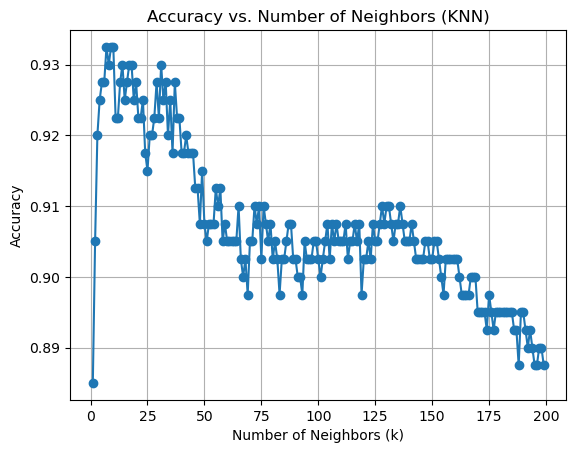

In [213]:
k_values = range(1, 200)  # Vary k from 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Neighbors (KNN)")
plt.grid(True)
plt.show()

In [211]:
accuracies

[0.885,
 0.905,
 0.92,
 0.925,
 0.9275,
 0.9275,
 0.9325,
 0.93,
 0.9325,
 0.9325,
 0.9225,
 0.9225,
 0.9275,
 0.93,
 0.925,
 0.9275,
 0.93,
 0.93,
 0.925,
 0.9275,
 0.9225,
 0.9225,
 0.925,
 0.9175,
 0.915,
 0.92,
 0.92,
 0.9225,
 0.9275,
 0.9225,
 0.93,
 0.925,
 0.9275,
 0.92,
 0.925,
 0.9175,
 0.9275,
 0.9225,
 0.9225,
 0.9175,
 0.9175,
 0.92,
 0.9175,
 0.9175,
 0.9175,
 0.9125,
 0.9125,
 0.9075,
 0.915,
 0.9075,
 0.905,
 0.9075,
 0.9075,
 0.9075,
 0.9125,
 0.91,
 0.9125,
 0.905,
 0.9075,
 0.905,
 0.905,
 0.905,
 0.905,
 0.905,
 0.91,
 0.9025,
 0.9,
 0.9025,
 0.8975,
 0.905,
 0.905,
 0.91,
 0.9075,
 0.91,
 0.9025,
 0.91,
 0.9075,
 0.905,
 0.9075,
 0.9025,
 0.905,
 0.9025,
 0.8975,
 0.9025,
 0.9025,
 0.905,
 0.9075,
 0.9075,
 0.9025,
 0.9025,
 0.9,
 0.9,
 0.8975,
 0.905,
 0.9025,
 0.9025,
 0.9025,
 0.905,
 0.905,
 0.9025,
 0.9,
 0.9025,
 0.905,
 0.9075,
 0.9025,
 0.9075,
 0.905,
 0.9075,
 0.905,
 0.905,
 0.905,
 0.9075,
 0.9025,
 0.905,
 0.905,
 0.9075,
 0.905,
 0.9075,
 0.8975,
 0.9